In [ ]:
#

In [ ]:
# CODING FOR THE PROJECT STARTS FROM THE CELL BELOW

In [10]:

import requests               # a simple HTTP library for Python
from bs4 import BeautifulSoup # a great library for webscrapping
import pickle                 # a library for data stream format

In [11]:
# Let take a look at the website scrapsfromtheloft.com , it's a nice source for movie detail information
# We will gather the data from the website: scrapsfromtheloft.com


def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="site-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [12]:
# Requesting transcripts
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [13]:
# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [14]:
# Load pickle file
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [15]:
# Take a look at the data
data.keys() ,data['louis'][:1]

(dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']),
 ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.'])

In [16]:
### Data cleaning step #####

# 
    # Make text all lower case
    # Remove punctuation
    # Remove numerical values
    # Remove common non-sensical text (/n)
    # Tokenize text
    # Remove stop words

# From the above depiction of the data, the format is a list consisting of 'text', like: ['text1', 'text2', 'text3',...] for just one commedian.
# Therefore it is necessary to combine them to one large chunk of text ['text1 + text2 + text3 +...]. 
# The purpose of implementing this is because all of these texts belong to each commedian, and to combine them to the only one 'text' will help us preprocessing on them effectively.



def combine_text(list_of_text):
    '''
    Take a list of texts and combine them into one large chunk of text
    
    Return a text (larger one)
    '''
    return ' '.join(list_of_text)
    



In [17]:
# Combining
data_combined = {key: [combine_text(value)] for key, value in data.items()}

In [18]:
### After having stored the data as a dictionary : {commedian : [text]}

# We will convert data to Pandas Dataframe inorder to demonstrate the power of pandas pre-processing

import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df.tail()

transcript
joe    [rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...
john   Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...
louis  Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
mike   Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ...
ricky  Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...

In [19]:
###  Cleaning of Text

# Here we’ll perform the following actions:

    # set all words to lowercase
    # remove all punctuations, including the question and exclamation marks
    # remove digits (words containg numbers)
    # remove stopwords
    # apply the PorterStemmer to keep the stem of the words
    # remove text in square brackets
    
import re       # stand for regular expression library
import string

def clean_text_re(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation,
       remove words containing numbers, additional punctuation and non-sensical text.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

step1 = lambda x: clean_text_re(x)

# Let clean the data:
data_clean = pd.DataFrame(data_df.transcript.apply(step1))
data_df.to_pickle("corpus.pkl")
print('DATA after cleaning with regular expression')
data_clean.tail()


DATA after cleaning with regular expression


transcript
joe       ladies and gentlemen welcome joe rogan  what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john   armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met b...
louis  introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...
mike   wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years...
ricky  hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...

In [20]:
### STRUCTURING THE DATA

# We will structure the data in two standard text-format

    #-A) Corpus (corpus is a collection of texts, and they are all put together neatly in a pandas dataframe ) The data_clean above is already stored as a Corpus

    #-B) Tokenization with Document term matrix. By Tokenization we simply refer to just breaking down the text into words. There are several way to do tokenization. 
      # In NLP & Deep leanring, we talk about word_embedding instead of document term matrix, however in this specific case of this project, we will implement the simpler one: Document term matrix with scikit learn.

    # Using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word. In addition, with CountVectorizer, we can remove stop words. 
      # Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.
        
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm.tail()


aaaaah  aaaaahhhhhhh  aaaaauuugghhhhhh  aaaahhhhh  aaah  aah  abc  \
joe         0             0                 0          0     0    0    0   
john        0             0                 0          0     0    0    0   
louis       0             0                 0          0     0    3    0   
mike        0             0                 0          0     0    0    0   
ricky       0             0                 0          0     0    0    0   

       abcs  ability  abject  ...  zee  zen  zeppelin  zero  zillion  zombie  \
joe       0        0       0  ...    0    0         0     0        0       0   
john      0        0       0  ...    0    0         0     0        0       0   
louis     0        0       0  ...    0    0         0     2        0       0   
mike      0        0       0  ...    0    0         2     1        0       0   
ricky     0        1       1  ...    0    0         0     0        0       0   

       zombies  zoning  zoo  éclair  
joe          0       0    0       0  
john         0       0    0       1  
louis        0       0    0       0  
mike         0       0    0       0  
ricky        0       0    1       0  

[5 rows x 7490 columns]

In [21]:
### STORING THE SAVING DATA

# We will use the to_pickle() method to save the data for later use. 
# Anytime this kernel is run and the directory folder is checked there saved data output would be saved therein.

## Save the data_dtm for later use 
data_dtm.to_pickle('dtm.pkl') 
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [22]:
####  EDA (Exploratory Data Analysis) for textual data

# As a rule of thumb, it's always essential to explore the data.

# Some of the EDA techniques we examine include most common words, amount of profanity, size of vocabulary etc. 
# EDA techniques will enable us gain insights from overt patterns in the text data. Whereas machine learning will enable us uncover covert patterns and insights.

    # Most common words - find these and create word clouds
    # Size of vocabulary - look number of unique words and also how quickly someone speaks
    # Amount of profanity - most common terms


In [23]:
# Reload the data
df = pd.read_pickle('dtm.pkl')
df = df.transpose()
df.head()

ali  anthony  bill  bo  dave  hasan  jim  joe  john  louis  \
aaaaah              0        0     1   0     0      0    0    0     0      0   
aaaaahhhhhhh        0        0     0   1     0      0    0    0     0      0   
aaaaauuugghhhhhh    0        0     0   1     0      0    0    0     0      0   
aaaahhhhh           0        0     0   1     0      0    0    0     0      0   
aaah                0        0     0   0     1      0    0    0     0      0   

                  mike  ricky  
aaaaah               0      0  
aaaaahhhhhhh         0      0  
aaaaauuugghhhhhh     0      0  
aaaahhhhh            0      0  
aaah                 0      0

In [24]:
## WORDS THAT HAVE THE HIGHEST FREQUENCY (MOST COMMON)

In [25]:
# Let fine top 30 common word said by each commedian

top_dict = {}   # Defined a dict to save the top word corresponding to respectively commedian

for person in df.columns:
    top_word = df[person].sort_values(ascending = False).head(30)
    top_dict[person] = list(zip(top_word.index, top_word.values))

In [26]:
# Look at the top most common words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in df.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

print(words[:5])

['like', 'im', 'know', 'just', 'dont']


In [27]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
print(Counter(words).most_common())

[('like', 12), ('im', 12), ('know', 12), ('just', 12), ('dont', 12), ('thats', 12), ('right', 12), ('people', 12), ('youre', 11), ('got', 10), ('time', 9), ('gonna', 8), ('think', 8), ('yeah', 7), ('said', 7), ('oh', 6), ('cause', 6), ('hes', 6), ('theyre', 6), ('say', 6), ('fucking', 6), ('fuck', 6), ('going', 6), ('shit', 5), ('day', 5), ('thing', 5), ('good', 5), ('want', 5), ('theres', 5), ('really', 5), ('did', 4), ('didnt', 4), ('guys', 3), ('ive', 3), ('little', 3), ('man', 3), ('life', 3), ('went', 3), ('ok', 2), ('lot', 2), ('women', 2), ('tell', 2), ('dude', 2), ('joke', 2), ('school', 2), ('guy', 2), ('make', 2), ('come', 2), ('love', 2), ('dad', 2), ('mom', 2), ('hey', 2), ('white', 2), ('goes', 2), ('kids', 2), ('real', 2), ('old', 2), ('mean', 2), ('id', 2), ('gotta', 1), ('wanna', 1), ('husband', 1), ('pregnant', 1), ('god', 1), ('need', 1), ('anthony', 1), ('grandma', 1), ('jokes', 1), ('okay', 1), ('baby', 1), ('let', 1), ('doing', 1), ('bo', 1), ('stuff', 1), ('repeat

In [28]:
# If more than half of the comedians have it as a top word, exclude it from the list and add to stop words list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
print(add_stop_words)

['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'time', 'gonna', 'think', 'yeah', 'said']


In [29]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

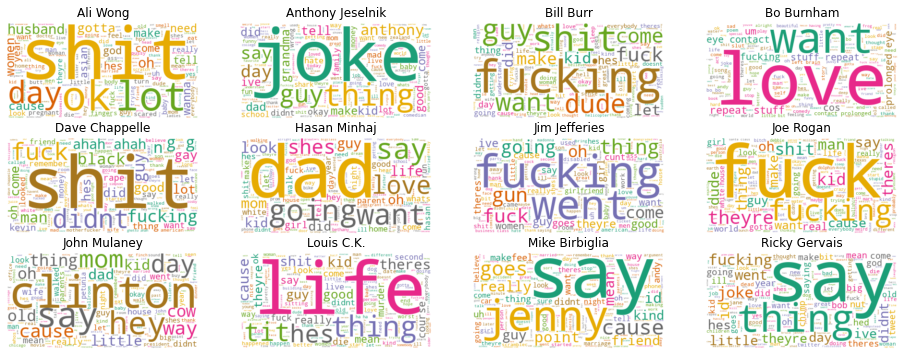

In [31]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']



# Create subplots for each comedian
for index, comedian in enumerate(df.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [ ]:
# From the above WordCloud, we see that alot of comedians use the word "fucking"

In [32]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in df.columns:
    uniques = df[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
1   Anthony Jeselnik          1038
9         Louis C.K.          1161
3         Bo Burnham          1325
6      Jim Jefferies          1363
0           Ali Wong          1399
4     Dave Chappelle          1442
8       John Mulaney          1455
7          Joe Rogan          1488
10    Mike Birbiglia          1549
5       Hasan Minhaj          1608
11     Ricky Gervais          1686
2          Bill Burr          1691

In [33]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in df.columns:
    totals = sum(df[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

comedian  unique_words  total_words  run_times  words_per_minute
1   Anthony Jeselnik          1038         2983         59         50.559322
3         Bo Burnham          1325         3243         60         54.050000
0           Ali Wong          1399         3361         60         56.016667
9         Louis C.K.          1161         3410         58         58.793103
4     Dave Chappelle          1442         4143         67         61.835821
6      Jim Jefferies          1363         4842         77         62.883117
10    Mike Birbiglia          1549         4820         76         63.421053
11     Ricky Gervais          1686         5051         79         63.936709
8       John Mulaney          1455         4097         62         66.080645
5       Hasan Minhaj          1608         4831         73         66.178082
2          Bill Burr          1691         5624         80         70.300000
7          Joe Rogan          1488         4657         63         73.920635

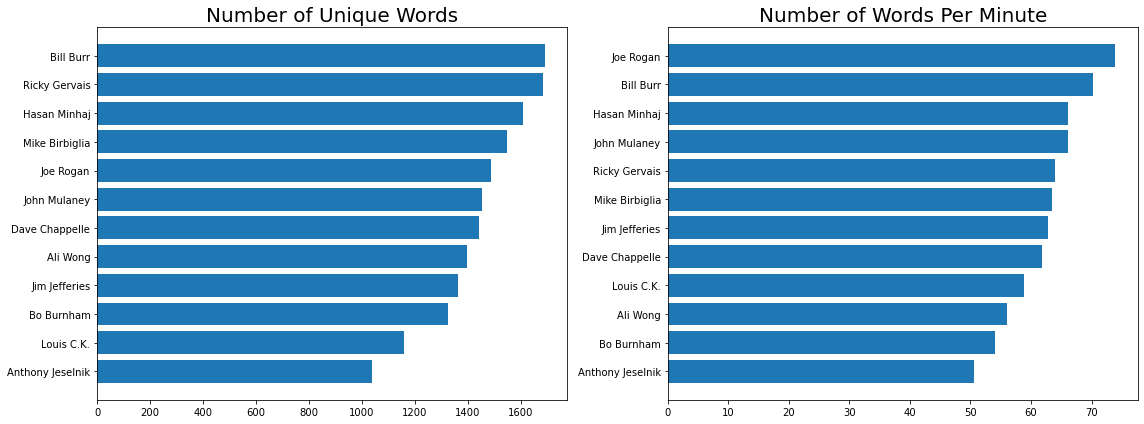

In [34]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [35]:
# From the above table and graphs, we can conclude that:

# In relation to the Vocabulary of the comedians, Ricky Gervais (British comedy) and Bill Burr (podcast host) have a larger use of vocabulary in their comedy
#  Whereas, Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary.

# With regards to Talking Speed:
#   Joe Rogan (blue comedy) and Bill Burr (podcast host) talk the fastest
#   Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk the slowest



In [36]:


#### NUMBER OF WORDS OF PROFANITY USED

In [37]:

# Let's isolate just these bad words
data_bad_words = df.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
ali          16      34
anthony      15       9
bill        107      64
bo           38       6
dave         65      46
hasan        24      15
jim         115      20
joe         135      40
john          4       6
louis        21      25
mike          0       0
ricky        60       6

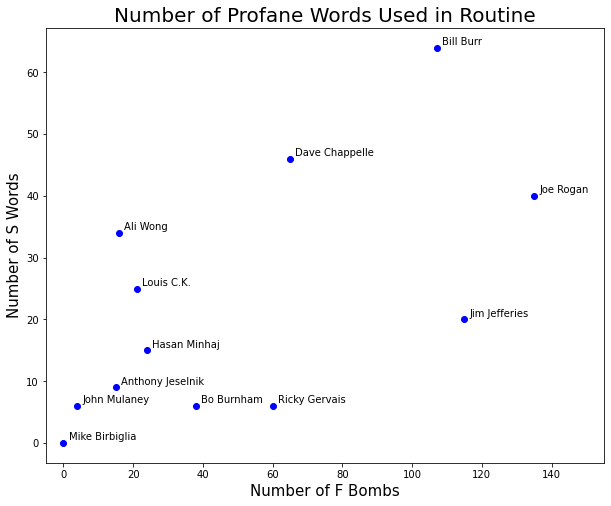

In [39]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Profane Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

In [40]:
####  SENTIMENT ANALYSIS #####

# A few key points to remember with sentiment analysis.

# TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
# Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
        # Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
        # Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.


In [41]:
data = pd.read_pickle('corpus.pkl')
data.tail()

transcript
joe    [rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...
john   Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...
louis  Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
mike   Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ...
ricky  Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...

In [42]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data.tail()

transcript  \
joe    [rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...   
john   Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...   
louis  Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...   
mike   Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ...   
ricky  Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...   

       polarity  subjectivity  
joe    0.005338      0.549925  
john   0.080620      0.482442  
louis  0.055901      0.514274  
mike   0.091535      0.516996  
ricky  0.065810      0.496598

In [43]:
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data['full_name'] = full_names

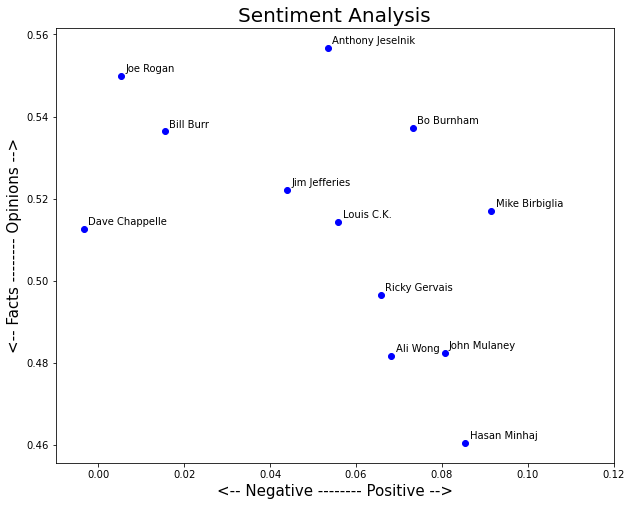

In [44]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)       
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [45]:
### ANALYSIS OF SENTIMENTS OF THE COMEDY ROUTINE OVER TIME

# Rather than looking at the overall sentiment, here we analyse to see if there are any significant changes in sentiment over time throughout each comedy routine.

In [46]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [47]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [48]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [49]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [50]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

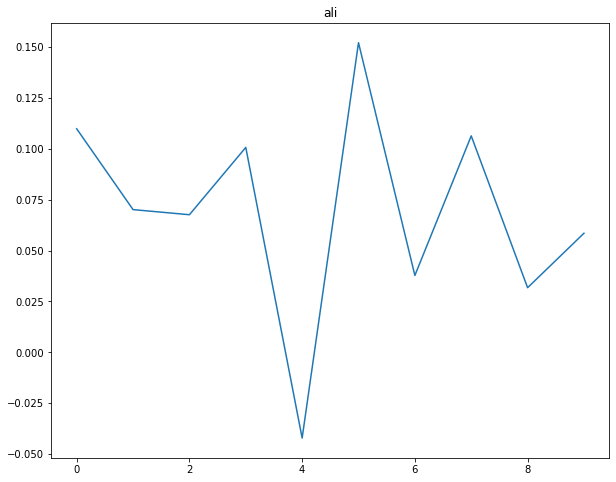

In [51]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

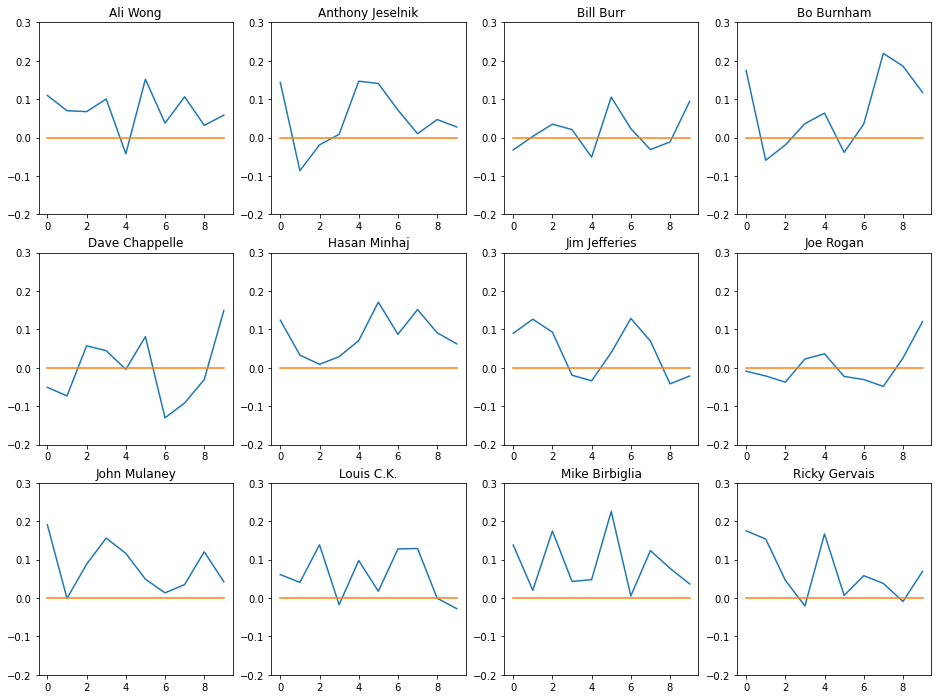

In [52]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [53]:
# From the graphs above, we come to the following conclusions:

# The comedian Ali Wong is broadly positive right through the routine. Similar conclusion could be made for comedians such as Mike Birbiglia & Louis C.K.

# Contrarily, we see that comedians such as Bo Burnham become happier as time passes, whereas Dave Chappelle has some really somber moments in his comedy.
